# Business Understanding

Problem Statements dan Goals Berdasarkan kondisi yang telah diuraikan sebelumnya, proyek ini akan memberikan solusi menggunakan pendekatan machine learning sistem rekomendasi secara personalisasi dari **permasalahan** sebagai berikut:
  * Berdasarkan atribut dataset, Bagaimana cara membantu konsumen dalam memilih produk skincare yang sesuai dengan jenis dan kondisi kulit mereka secara akurat?
  * Seberapa efektif pendekatan content-based filtering dalam mengurangi risiko efek samping dari pemilihan produk yang tidak tepat dibandingkan dengan pendekatan tradisional?

Tujuan atau goals untuk menjawab pertanyaan tersebut sebagai berikut:
  * Menyediakan rekomendasi produk skincare yang dipersonalisasi berdasarkan atribut konten produk (jenis kulit, permasalahan kulit, dan kandungan bahan aktif) menggunakan dataset skincare dari Kaggle.
  * Menganalisis efektivitas pendekatan content-based filtering dalam mengurangi risiko efek samping seperti iritasi kulit, dengan membandingkan hasil rekomendasi terhadap pendekatan rekomendasi tradisional (misalnya rekomendasi populer atau umum).



## Setup Libraries

Pada tahapan awal yaitu mengimpor seluruh library yang dibutuhkan untuk proyek ini

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import squarify
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Load & Read Dataset

Tahapan kedua yaitu load dataset yang diambil dari kaggle, selanjutnya read data dan menemukan informasi awal

In [3]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle

# Menyalin kaggle.json ke dalam folder yang sudah dibuat
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d muhammadrefki/dataset-skincare

# Mengekstrak berkas zip ke direktori aktif
!unzip /content/dataset-skincare.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/muhammadrefki/dataset-skincare
License(s): unknown
  0% 0.00/2.90k [00:00<?, ?B/s]
100% 2.90k/2.90k [00:00<00:00, 765kB/s]
Archive:  /content/dataset-skincare.zip
  inflating: dataset_skic.csv        


read dataset dengan nama variabel "skincare_product", memiliki 185 baris dan 9 columns yang terdiri dari ID produk, nama Brand, Ingredients, Jenis Produk, Tipe Kulit, Masalah Kulit, Ukuran produk, Bahan Aktif, Tahun Rilis.
Ada beberapa nama kolom yang perlu dirubah supaya lebih mudah dipahami untuk menggambarkan kolom tersebut sehingga tidak ambigu

In [4]:
skincare_product = pd.read_csv('/content/dataset_skic.csv')
skincare_product

,ID,Brand,Produk,Jenis Produk,Untuk Kulit,Masalah Kulit,Ukuran,Tipe Bahan Aktif,Tahun Rilis
0,1,Avoskin,Tea Tree Spot Gel,Essence,Berminyak,Jerawat,100 ml,Bakuchiol,2021
1,2,Dear Me Beauty,Bakuchiol Night Cream,Essence,Kering,Dehidrasi,50 ml,Hyaluronic Acid,2023
2,3,Somethinc,Glow Boost Serum,Gel,Berminyak,Flek hitam,30 ml,Salicylic Acid,2018
3,4,COSRX,Acne Treatment Serum,Cleanser,Berminyak,Iritasi,100 ml,Bakuchiol,2018
4,5,The Ordinary,Tea Tree Spot Gel,Sunscreen,Berminyak,Kusam,100 ml,Hyaluronic Acid,2022
...,...,...,...,...,...,...,...,...,...
180,181,Avoskin,Retinol Night Serum,Sunscreen,Sensitif,Kusam,30 ml,Vitamin C,2019
181,182,Skintific,Ceramide Barrier Moisturizer,Moisturizer,Kering,Kusam,20 ml,Bakuchiol,2022
182,183,COSRX,Niacinamide 10% + Zinc 1%,Gel,Normal,Flek hitam,100 ml,Hyaluronic Acid,2018
183,184,Wardah,Miraculous Retinol Ampoule,Cream,Sensitif,Iritasi,30 ml,Ceramide,2022


## Exploratory Data Analysis

Cakupan proses analis EDA untuk membantu menjawab beberapa pertanyaan berikut:
  * Berapa jumlah total produk skincare dalam dataset? & Apa saja kolom/fitur yang tersedia dalam dataset?
  * Bagaimana distribusi variabel dalam dataset?
  * Apakah ada fitur yang tidak berguna (redundant)?
  * Apakah ada nilai yang hilang (missing values)/ duplikat dalam dataset? Jika ya, di kolom mana saja dan seberapa besar proporsinya?
  * Bagaimana distribusi jenis kulit yang disasar oleh produk (misalnya: kering, berminyak, kombinasi, sensitif)?
  * Apa saja kategori permasalahan kulit yang paling umum ditemukan?

Deskripsi Variabel Berdasarkan informasi dari Kaggle, variabel-variabel pada skincare product dataset adalah sebagai berikut:

  - ID	: ID produk skincare
  - Brand	: Nama merek produk skincare
  - Nama Product :	Nama produk skincare
  - Jenis produk :	Kategori produk, misalnya pembersih, toner, serum, pelembap, atau tabir surya.
  - Jenis kulit	: Jenis kulit yang menjadi target produk, seperti normal, kering, berminyak, kombinasi, atau sensitif
  - Masalah kulit : 	Masalah Kulit yang dialami(Jerawat, lek hitam, dehidrasi
  - Ukuran :	Ukuran isi produk (misalnya: 50mL, 100mL, 250mL).
  - Bahan Aktif	: Daftar bahan aktif atau komposisi utama yang terkandung dalam produk.
  - Tahun Rilis : Tahun pembuatan/rilis product

### Informasi Data

Melihat informasi dari skincare_product.info() insight yang diperoleh yaitu
1. Terdapat 185 entri(baris) dan 9 kolom yang terdiri dari ID, Brand, Produk, Jenis Produk, Untuk Kulit, Masalah kulit, Ukuran, Tipe Bahan Aktif, Tahun Rilis
2. Semua kolom tidak ada yang missing value (non-null)
3. Ada 2 tipe data integer(2) dan objek(7)
4. Nama variabel dalam dataset ini kurang dapat dipahami, oleh karena itu perlu diubah menjadi nama variabel yang dpt dipahami
5. Tipe data Ukuran diubah menjadi numerik (integer) bukan objek

In [5]:
skincare_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                185 non-null    int64 
 1   Brand             185 non-null    object
 2   Produk            185 non-null    object
 3   Jenis Produk      185 non-null    object
 4   Untuk Kulit       185 non-null    object
 5   Masalah Kulit     185 non-null    object
 6   Ukuran            185 non-null    object
 7   Tipe Bahan Aktif  185 non-null    object
 8   Tahun Rilis       185 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 13.1+ KB


Melihat statistik pada skincare_product
1. skincare_product.describe() menampilkan statistik numerik saja, insight yg didapatkan :
   - Terdapat 185 data / ID
   - Produk dengan tahun rilis paling lama di tahun 2018 dan terbaru 2023 serta rata-rata rilis produk di tahun 2020

In [6]:
skincare_product.describe()

,ID,Tahun Rilis
count,185.000000,185.000000
mean,93.000000,2020.454054
std,53.549043,1.781334
min,1.000000,2018.000000
25%,47.000000,2019.000000
50%,93.000000,2020.000000
75%,139.000000,2022.000000
max,185.000000,2023.000000


Melihat statistik pada skincare_product
1. skincare_product.describe() menampilkan statistik numerik saja, insight yg didapatkan :
   - Terdapat 185 data / ID
   - Produk dengan tahun rilis paling lama di tahun 2018 dan terbaru 2023 serta rata-rata rilis produk di tahun 2020
2. skincare_product.describe(include='all') menampilkan seluruh statistik dari variabel dataset, insight yang didapatkan, merk produk paling top/ dipakai adalah "Avoskin", nama produk "ceramide barrier moisturizer
3. Masalah kulit paling banyak yaitu karena kusam
4. Statistik ini juga menampilkan bahwa semua data sebanyak 185 tidak ada missing value

In [7]:
skincare_product.describe(include='all')

,ID,Brand,Produk,Jenis Produk,Untuk Kulit,Masalah Kulit,Ukuran,Tipe Bahan Aktif,Tahun Rilis
count,185.000000,185,185,185,185,185,185,185,185.000000
unique,NaN,10,20,8,5,8,4,8,NaN
top,NaN,Avoskin,Ceramide Barrier Moisturizer,Gel,Kombinasi,Kusam,50 ml,Salicylic Acid,NaN
freq,NaN,25,13,30,46,32,54,34,NaN
mean,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.454054
std,53.549043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.781334
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000
50%,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000


Menampilkan duplikat pada dataset skincare_product, dan hasilnya tidak ada duplikasi data.

In [8]:
skincare_product.duplicated().sum()

np.int64(0)

In [9]:
print('Nama produk: ',skincare_product['Produk'].unique())

Nama produk:  ['Tea Tree Spot Gel' 'Bakuchiol Night Cream' 'Glow Boost Serum'
 'Acne Treatment Serum' 'Salicylic Acid Daily Gentle Cleanser'
 'Advanced Snail 96 Mucin Essence' 'Miraculous Retinol Ampoule'
 'Brightening Facial Wash' 'Luminous Whitening Night Cream'
 'Hydra Boost Essence' 'Green Tea Balancing Toner'
 'Daily Sunscreen SPF 50 PA+++' 'Retinol Night Serum'
 'Hydrating Aloe Vera Gel' 'Niacinamide 10% + Zinc 1%' 'Vitamin C Serum'
 'Hyaluronic B5 Serum' 'Cica Soothing Cream'
 'Ceramide Barrier Moisturizer' 'Exfoliating Toner']


### Visualisasi

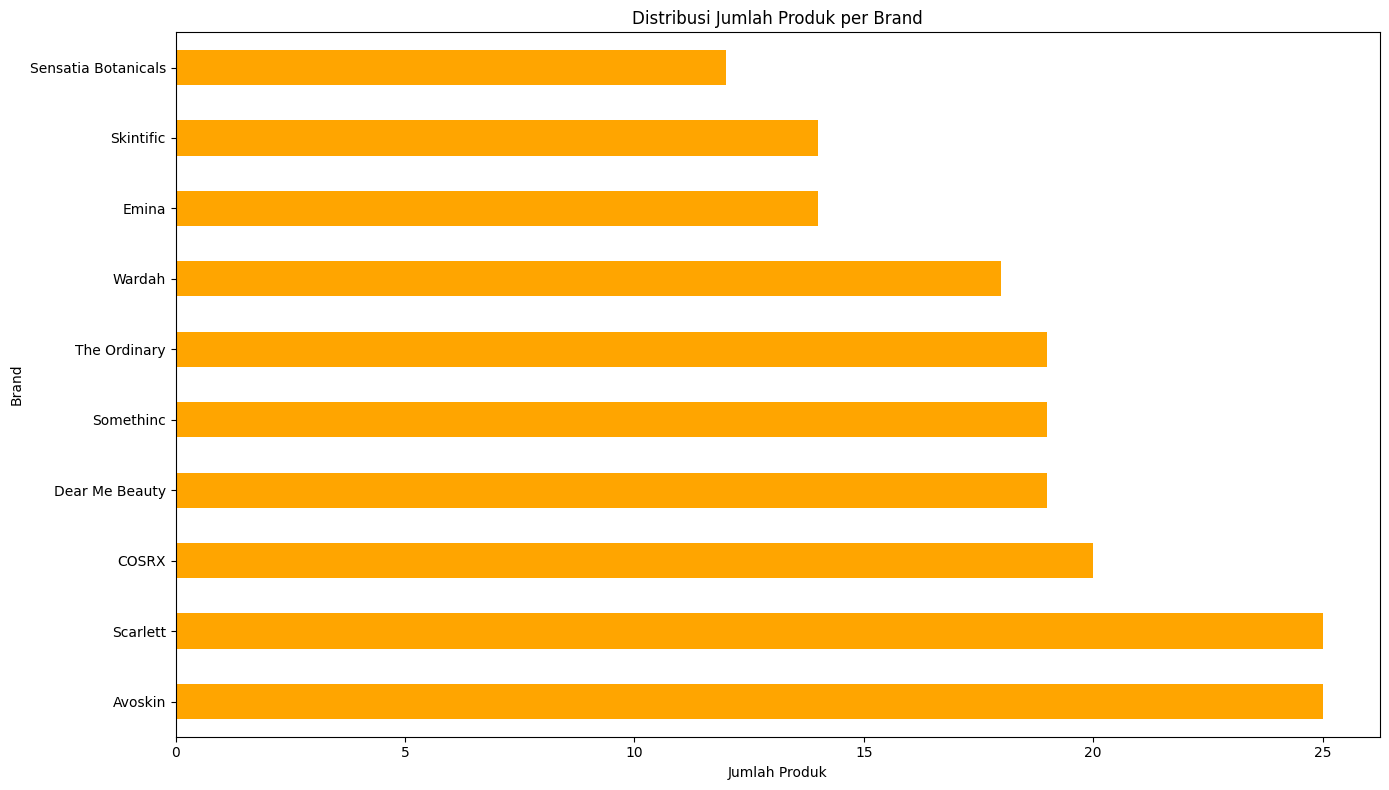

In [10]:
# Visualisasi Brand
plt.figure(figsize=(14, 8))
skincare_product['Brand'].value_counts().plot(kind='barh', color='orange')
plt.title('Distribusi Jumlah Produk per Brand')
plt.xlabel('Jumlah Produk')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

Melihat sebaran data tipe kulit dengan visualisasi terlihat bahwa tipe kulit paling banyak adalah kombinasi memiliki jumlah produk lebih dari 40


=== DISTRIBUSI JENIS KULIT (TARGET MARKET) ===
Untuk Kulit
Kombinasi    46
Kering       38
Berminyak    35
Sensitif     33
Normal       33
Name: count, dtype: int64


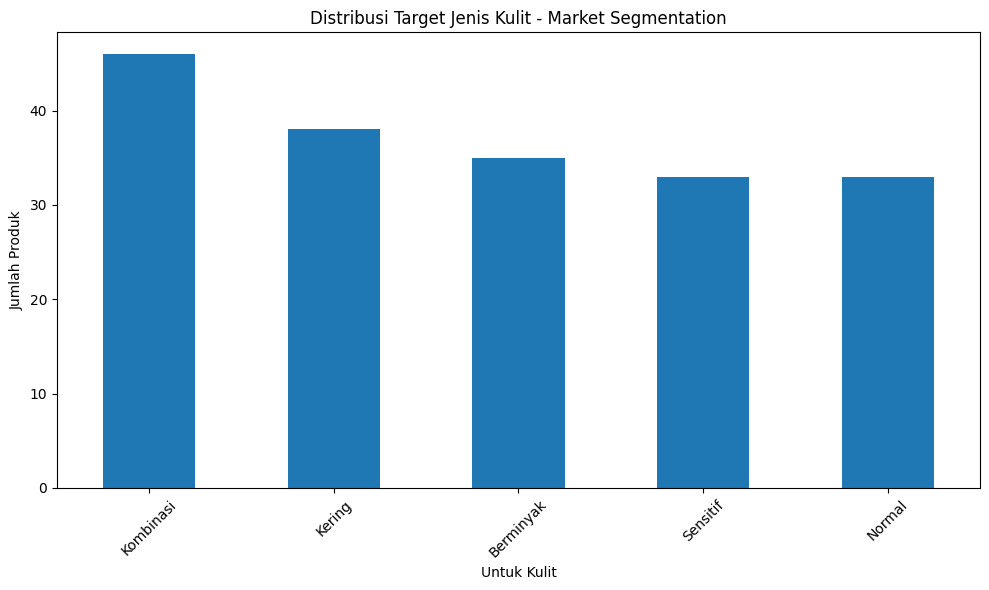

In [11]:
# Analisis bisnis - distribusi jenis kulit
if 'Untuk Kulit' in skincare_product.columns:
    print("\n=== DISTRIBUSI JENIS KULIT (TARGET MARKET) ===")
    skin_type_dist = skincare_product['Untuk Kulit'].value_counts()
    print(skin_type_dist)

    # Visualisasi target market
    plt.figure(figsize=(10, 6))
    skin_type_dist.plot(kind='bar')
    plt.title('Distribusi Target Jenis Kulit - Market Segmentation')
    plt.ylabel('Jumlah Produk')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

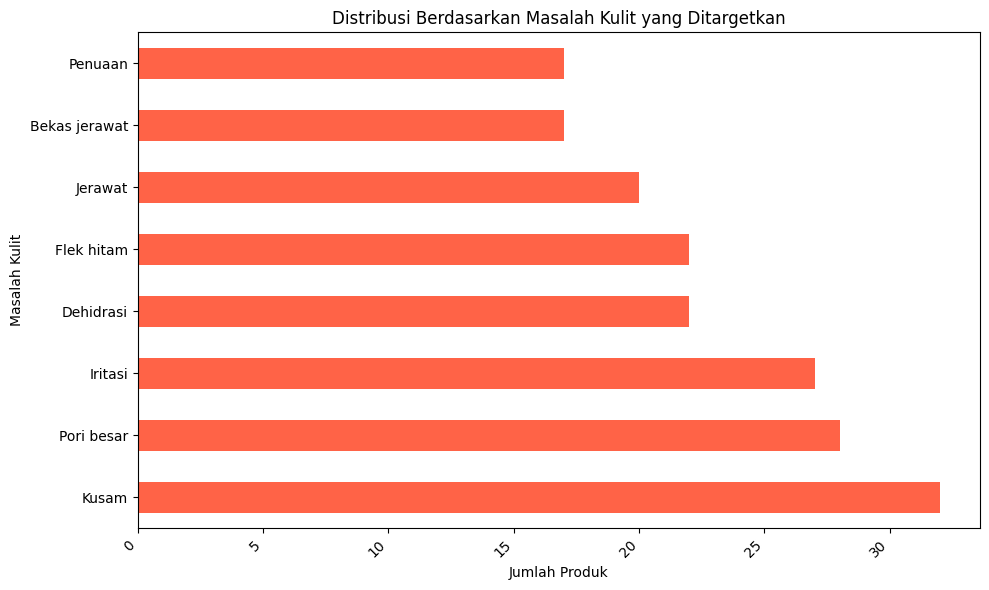

In [12]:
# Visualisasi Distribusi Produk berdasarkan Masalah kulit
# Hitung jumlah produk per masalah kulit
skin_issues = skincare_product['Masalah Kulit'].value_counts()

plt.figure(figsize=(10, 6))
skin_issues.plot(kind='barh', color='tomato')

plt.title('Distribusi Berdasarkan Masalah Kulit yang Ditargetkan')
plt.ylabel('Masalah Kulit')
plt.xlabel('Jumlah Produk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

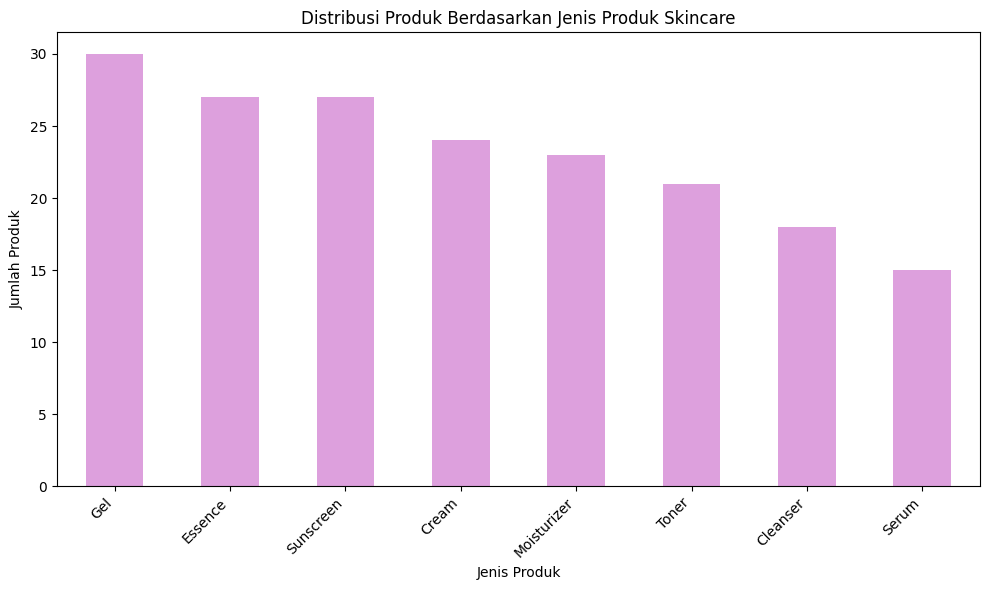

In [13]:
# Vidsualisasi distribusi Produk
product_types = skincare_product['Jenis Produk'].value_counts()
plt.figure(figsize=(10, 6))
product_types.plot(kind='bar', color='plum')

plt.title('Distribusi Produk Berdasarkan Jenis Produk Skincare')
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

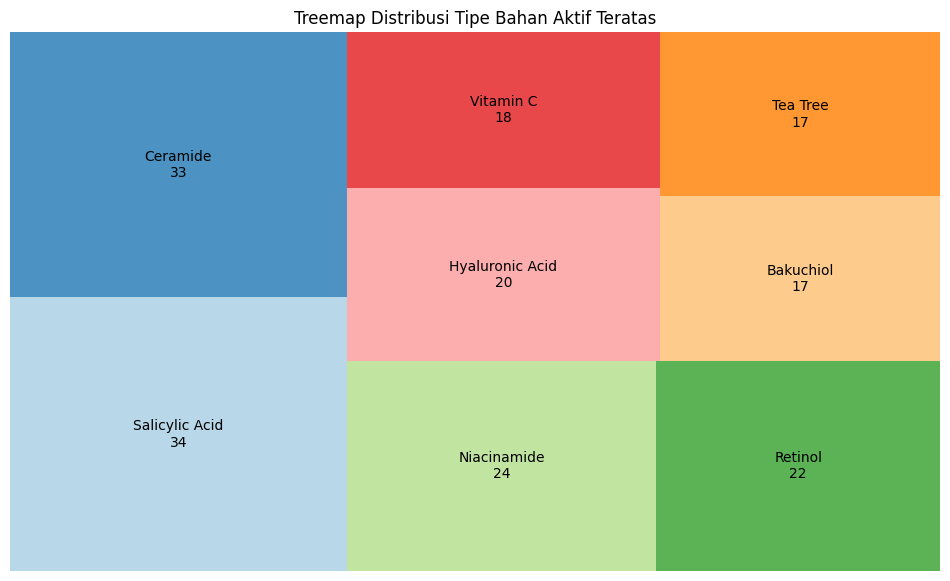

In [14]:
#Visualisasi distribusi tipe bahan aktif
top_active = skincare_product['Tipe Bahan Aktif'].value_counts().nlargest(15)
labels = top_active.index + '\n' + top_active.astype(str)

plt.figure(figsize=(12, 7))
squarify.plot(sizes=top_active, label=labels, alpha=0.8, color=plt.cm.Paired.colors)
plt.axis('off')
plt.title('Treemap Distribusi Tipe Bahan Aktif Teratas')
plt.show()

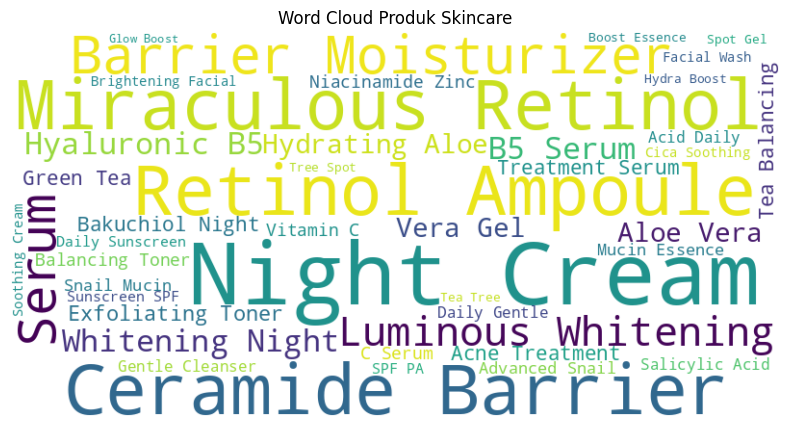

In [15]:
# Visualisasi Produk Skincare
all_active_ingredients = ' '.join(skincare_product['Produk'].dropna().str.replace(',', ' '))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_active_ingredients)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Produk Skincare')
plt.show()

Menampilkan distribusi outlier pada data categorikal, hasilnya tidak ada outlier

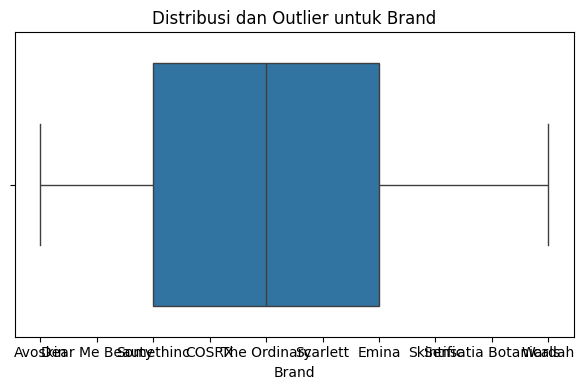

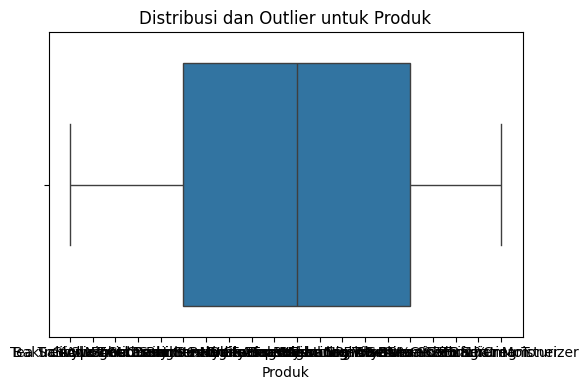

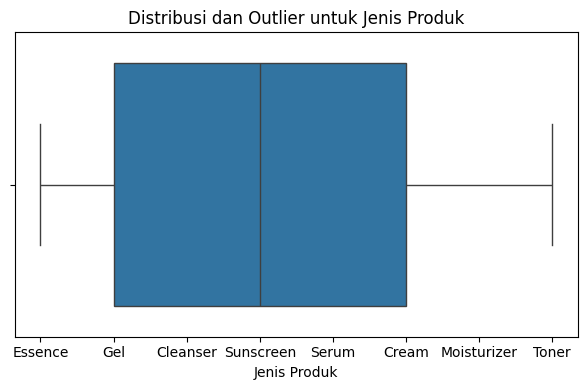

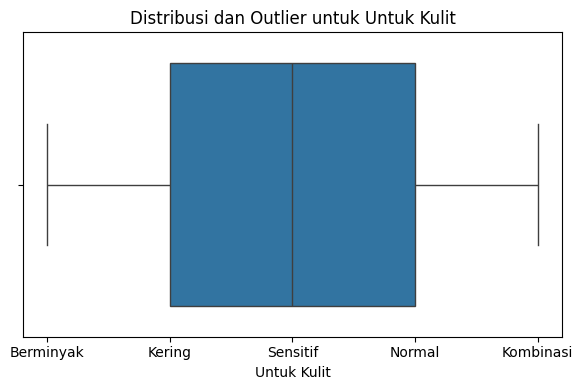

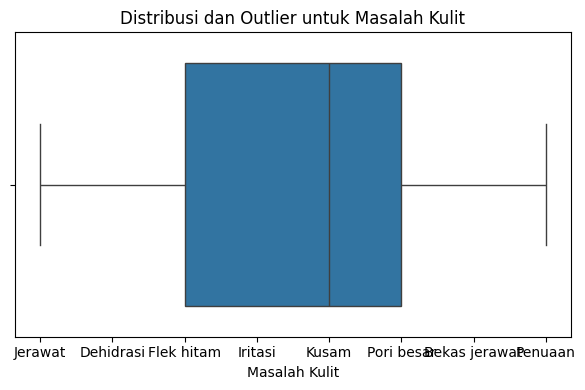

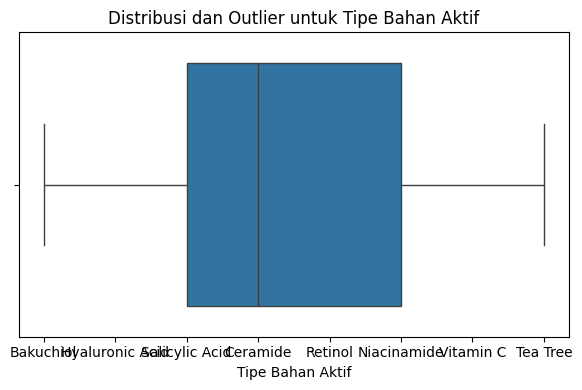

In [16]:
# Melihat outlier pada data kategorikal
categorical_cols = ['Brand', 'Produk', 'Jenis Produk', 'Untuk Kulit', 'Masalah Kulit', 'Tipe Bahan Aktif',]
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=skincare_product, x=col)
    plt.title(f'Distribusi dan Outlier untuk {col}')
    plt.tight_layout()
    plt.show()


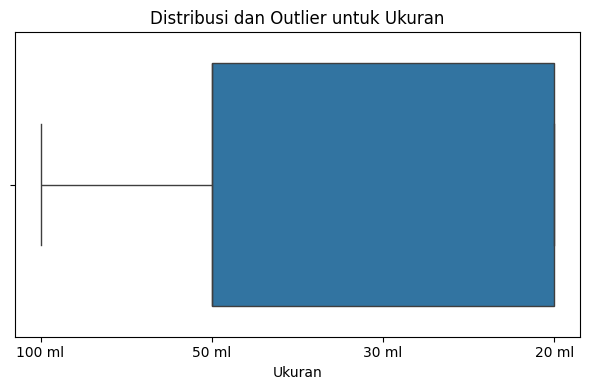

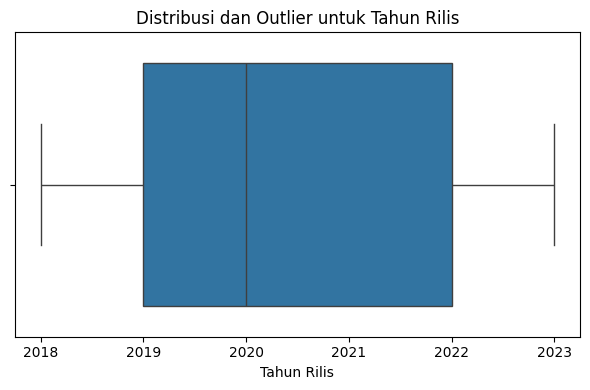

In [17]:
# Melihat outlier pada data kategorikal
numeric_cols = ['Ukuran', 'Tahun Rilis']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=skincare_product, x=col)
    plt.title(f'Distribusi dan Outlier untuk {col}')
    plt.tight_layout()
    plt.show()

## Data Preparation

In [18]:
# Mengubah Nama variabel
skincare_product = skincare_product.rename(columns={
    'Brand': 'Nama_Brand',
    'Produk': 'Nama_Produk',
    'Jenis Produk': 'Jenis_Produk',
    'Untuk Kulit': 'Jenis_Kulit',
    'Masalah Kulit': 'Masalah_Kulit',
    'Ukuran' : 'Ukuran(ML)',
    'Tipe Bahan Aktif': 'Ingredients',
    'Tahun Rilis': 'Tahun_Rilis'
})
skincare_product.tail()

,ID,Nama_Brand,Nama_Produk,Jenis_Produk,Jenis_Kulit,Masalah_Kulit,Ukuran(ML),Ingredients,Tahun_Rilis
180,181,Avoskin,Retinol Night Serum,Sunscreen,Sensitif,Kusam,30 ml,Vitamin C,2019
181,182,Skintific,Ceramide Barrier Moisturizer,Moisturizer,Kering,Kusam,20 ml,Bakuchiol,2022
182,183,COSRX,Niacinamide 10% + Zinc 1%,Gel,Normal,Flek hitam,100 ml,Hyaluronic Acid,2018
183,184,Wardah,Miraculous Retinol Ampoule,Cream,Sensitif,Iritasi,30 ml,Ceramide,2022
184,185,Sensatia Botanicals,Cica Soothing Cream,Sunscreen,Sensitif,Bekas jerawat,50 ml,Salicylic Acid,2021


In [19]:
# Menghapus kata ml dan Mengubah tipe data Ukuran
skincare_product['Ukuran(ML)'] = skincare_product['Ukuran(ML)'].str.replace('ml', '', case=False).str.strip()
skincare_product['Ukuran(ML)'] = pd.to_numeric(skincare_product['Ukuran(ML)'], errors='coerce')

In [20]:
skincare_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             185 non-null    int64 
 1   Nama_Brand     185 non-null    object
 2   Nama_Produk    185 non-null    object
 3   Jenis_Produk   185 non-null    object
 4   Jenis_Kulit    185 non-null    object
 5   Masalah_Kulit  185 non-null    object
 6   Ukuran(ML)     185 non-null    int64 
 7   Ingredients    185 non-null    object
 8   Tahun_Rilis    185 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 13.1+ KB


In [21]:
# Menghapus Kolom yang tidak diperlukan dalam modeling
# Kolom ID
skincare_product = skincare_product.drop(['ID'], axis=1)
skincare_product.head()

,Nama_Brand,Nama_Produk,Jenis_Produk,Jenis_Kulit,Masalah_Kulit,Ukuran(ML),Ingredients,Tahun_Rilis
0,Avoskin,Tea Tree Spot Gel,Essence,Berminyak,Jerawat,100,Bakuchiol,2021
1,Dear Me Beauty,Bakuchiol Night Cream,Essence,Kering,Dehidrasi,50,Hyaluronic Acid,2023
2,Somethinc,Glow Boost Serum,Gel,Berminyak,Flek hitam,30,Salicylic Acid,2018
3,COSRX,Acne Treatment Serum,Cleanser,Berminyak,Iritasi,100,Bakuchiol,2018
4,The Ordinary,Tea Tree Spot Gel,Sunscreen,Berminyak,Kusam,100,Hyaluronic Acid,2022


In [22]:
skincare_product.shape

(185, 8)

Terlihat bahwa tipe data sudah berganti menjadi integer dan nama variabel sudah berganti menjadi nama yang mudah dipahami. Data sudah cukup clean, tidak ada missing value, duplikat, dan outlier. selain itu saya menghapus kolom yang tidak berpengaruh signifikan terhadap analisis proyek ini. hasil akhir menjadi 6 kolom

# Model Development Content Based Filtering

In [23]:
data = skincare_product
data.sample(5)

,Nama_Brand,Nama_Produk,Jenis_Produk,Jenis_Kulit,Masalah_Kulit,Ukuran(ML),Ingredients,Tahun_Rilis
56,Dear Me Beauty,Luminous Whitening Night Cream,Cream,Sensitif,Pori besar,30,Niacinamide,2021
96,Scarlett,Green Tea Balancing Toner,Essence,Sensitif,Kusam,50,Retinol,2019
83,Scarlett,Salicylic Acid Daily Gentle Cleanser,Toner,Kombinasi,Iritasi,50,Vitamin C,2023
113,COSRX,Vitamin C Serum,Toner,Normal,Jerawat,20,Salicylic Acid,2023
54,Dear Me Beauty,Advanced Snail 96 Mucin Essence,Sunscreen,Kering,Pori besar,50,Vitamin C,2019


In [24]:
data['Jenis_Produk'].unique()

array(['Essence', 'Gel', 'Cleanser', 'Sunscreen', 'Serum', 'Cream',
       'Moisturizer', 'Toner'], dtype=object)

In [25]:
data['Masalah_Kulit'].unique()

array(['Jerawat', 'Dehidrasi', 'Flek hitam', 'Iritasi', 'Kusam',
       'Pori besar', 'Bekas jerawat', 'Penuaan'], dtype=object)

Menjawab Pertanyaan bisnis :
1. Kesulitan Konsumen dalam Memilih Produk Skincare yang Sesuai: Konsumen sering kali menghadapi kebingungan dalam memilih produk skincare yang sesuai dengan jenis kulit mereka (misalnya, kering, berminyak, kombinasi, atau sensitif) dan masalah kulit (seperti jerawat, dehidrasi, atau kusam) karena banyaknya variasi produk di pasaran.

**TF-IDF Vectorizer**
ekstraksi fitur dan vektorisasi konten produk  dengan tujuan : menyusun kemiripan antar produk agar sistem bisa menyarankan produk serupa yang aman dan cocok.

In [28]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data Ingredient
tf.fit(data['Ingredients'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['acid', 'bakuchiol', 'ceramide', 'hyaluronic', 'niacinamide',
       'retinol', 'salicylic', 'tea', 'tree', 'vitamin'], dtype=object)

In [29]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['Ingredients'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(185, 10)

In [30]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.5720003 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.63900751, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.5720003 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.63900751, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [31]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan Ingredients
# Baris diisi dengan Nama Produk

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.Nama_Produk
).sample(22, axis=1, replace=True).sample(10, axis=0)

,niacinamide,tree,ceramide,salicylic,tree,acid,tea,ceramide,bakuchiol,bakuchiol,...,retinol,tea,tea,hyaluronic,vitamin,salicylic,retinol,bakuchiol,acid,hyaluronic
Nama_Produk,,,,,,,,,,,,,,,,,,,,,
Exfoliating Toner,1.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.000000
Hydrating Aloe Vera Gel,0.0,0.0,0.0,0.7692,0.0,0.639008,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.7692,0.0,0.0,0.639008,0.000000
Hyaluronic B5 Serum,0.0,0.0,0.0,0.7692,0.0,0.639008,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.7692,0.0,0.0,0.639008,0.000000
Glow Boost Serum,0.0,0.0,0.0,0.7692,0.0,0.639008,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.7692,0.0,0.0,0.639008,0.000000
Daily Sunscreen SPF 50 PA+++,0.0,0.0,0.0,0.0000,0.0,0.572000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.820253,0.0,0.0000,0.0,0.0,0.572000,0.820253
Glow Boost Serum,0.0,0.0,0.0,0.7692,0.0,0.639008,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.7692,0.0,0.0,0.639008,0.000000
Advanced Snail 96 Mucin Essence,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,1.0,0.0000,0.0,0.0,0.000000,0.000000
Bakuchiol Night Cream,1.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.000000
Ceramide Barrier Moisturizer,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,1.0,0.000000,0.000000


## Cosine Similarity
Menghitung kemiripan dengan tujuan: Merekomendasikan produk yang mirip dengan preferensi user, tapi tetap aman dan cocok.

In [32]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.36551249, ..., 1.        , 0.        ,
        0.36551249],
       [0.        , 0.36551249, 1.        , ..., 0.36551249, 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.36551249, ..., 1.        , 0.        ,
        0.36551249],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.36551249, 1.        , ..., 0.36551249, 0.        ,
        1.        ]])

In [33]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama produk
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Nama_Produk'], columns=data['Nama_Produk'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (185, 185)


Nama_Produk,Exfoliating Toner,Green Tea Balancing Toner,Vitamin C Serum,Retinol Night Serum,Miraculous Retinol Ampoule
Nama_Produk,,,,,
Hydrating Aloe Vera Gel,0.0,0.000000,0.0,1.0,0.0
Glow Boost Serum,0.0,0.365512,0.0,0.0,0.0
Cica Soothing Cream,0.0,0.000000,0.0,0.0,0.0
Daily Sunscreen SPF 50 PA+++,0.0,1.000000,0.0,0.0,0.0
Green Tea Balancing Toner,0.0,0.000000,0.0,0.0,0.0
Ceramide Barrier Moisturizer,1.0,0.000000,1.0,0.0,0.0
Acne Treatment Serum,0.0,0.000000,0.0,0.0,0.0
Hydra Boost Essence,0.0,0.000000,0.0,1.0,0.0
Retinol Night Serum,1.0,0.000000,1.0,0.0,0.0


## Mendapatkan Rekomendasi
dengan tujuan jika user menyukai satu produk, rekomendasikan produk yang mirip dan aman berdasarkan ingredients

| Tujuan                                        | Solusi Content-Based Filtering                                       |
| --------------------------------------------- | -------------------------------------------------------------------- |
| Membantu konsumen memilih produk sesuai kulit | Mirip berdasarkan kandungan, bukan iklan / rating                    |
| Mengurangi risiko efek samping                | Sistem hanya menyarankan produk dengan komposisi serupa              |


In [36]:
def get_recommendations(product_name, cosine_sim=cosine_sim, df=data, num_recommendations=5):
    """
    Fungsi untuk mendapatkan rekomendasi produk berdasarkan content-based filtering

    Parameters:
    -----------
    product_name : str
        Nama produk yang ingin dicari rekomendasinya
    cosine_sim : array
        Matrix cosine similarity
    df : DataFrame
        DataFrame yang berisi data produk
    num_recommendations : int
        Jumlah rekomendasi yang diinginkan

    Returns:
    --------
    DataFrame : Rekomendasi produk dengan ingredient
    """

    # Cek apakah produk ada dalam dataset
    if product_name not in df['Nama_Produk'].values:
        print(f"Produk '{product_name}' tidak ditemukan dalam dataset!")
        return pd.DataFrame()

    # Dapatkan index produk
    idx = df[df['Nama_Produk'] == product_name].index[0]

    # Dapatkan similarity scores untuk produk tersebut
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan produk berdasarkan similarity score (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top N produk (skip index 0 karena itu produk itu sendiri)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Dapatkan index produk yang direkomendasikan
    product_indices = [i[0] for i in sim_scores]

    # Return rekomendasi produk
    recommendations = df.iloc[product_indices][['Nama_Brand','Nama_Produk', 'Jenis_Produk','Ingredient','Jenis_Kulit','Masalah_Kulit']].copy()

    # Tambahkan similarity score
    similarity_scores = [i[1] for i in sim_scores]
    recommendations['Similarity_Score'] = similarity_scores

    return recommendations

In [37]:
get_recommendations('Glow Boost Serum')

,Nama_Brand,Nama_Produk,Jenis_Produk,Ingredients,Jenis_Kulit,Masalah_Kulit,Similarity_Score
9,The Ordinary,Bakuchiol Night Cream,Serum,Salicylic Acid,Normal,Flek hitam,1.0
10,Avoskin,Glow Boost Serum,Moisturizer,Salicylic Acid,Kering,Jerawat,1.0
11,Somethinc,Miraculous Retinol Ampoule,Sunscreen,Salicylic Acid,Normal,Kusam,1.0
19,The Ordinary,Bakuchiol Night Cream,Moisturizer,Salicylic Acid,Normal,Bekas jerawat,1.0
24,COSRX,Luminous Whitening Night Cream,Cleanser,Salicylic Acid,Sensitif,Iritasi,1.0


Menampilkan 5 rekomendasi serupa dengan nama produk **Glow Boost Serum** berdasarkan Nama Brand, Jenis produk, Jenis kulit, masalah kulit, Ingredients, dan nilai similarity

## Evaluasi

In [44]:
def precision_evaluation(product_name, k=10, threshold=0.3):
    """
    Evaluasi precision otomatis berdasarkan similarity threshold
    """
    print(f"Evaluation: {product_name}")
    print("="*50)

    # Dapatkan rekomendasi
    recommendations = get_recommendations(product_name, num_recommendations=k)

    if recommendations.empty:
        print("No recommendations found!")
        return

    # Hitung yang relevan berdasarkan threshold
    relevant_recs = recommendations[recommendations['Similarity_Score'] > threshold]
    true_recommended = len(relevant_recs)

    # Hitung precision
    Precision = (true_recommended / k) * 100

    print(f"Threshold: {threshold}")
    print(f"Relevant recommendations: {true_recommended}/{k}")
    print(f"Precision of the model is {Precision}%")

    return Precision

In [50]:
precision_evaluation('Luminous Whitening Night Cream', k=10, threshold=0.7)

Evaluation: Luminous Whitening Night Cream
Threshold: 0.7
Relevant recommendations: 10/10
Precision of the model is 100.0%


100.0

- Threshold 0.7 : produk sebagai rekomendasi yang valid kalau cosine similarity-nya ≥ 0.7.

- Relevant Recommendations: 10/10
Dari 10 produk yang direkomendasikan untuk Luminous Whitening Night Cream, semuanya (10 dari 10) dianggap relevan — artinya cocok dengan produk aslinya, berdasarkan definisi relevansi  (misalnya jenis kulit yang sama, ingredient mirip).

In [53]:
get_recommendations('Daily Sunscreen SPF 50 PA+++')

,Nama_Brand,Nama_Produk,Jenis_Produk,Ingredients,Jenis_Kulit,Masalah_Kulit,Similarity_Score
4,The Ordinary,Tea Tree Spot Gel,Sunscreen,Hyaluronic Acid,Berminyak,Kusam,1.0
5,Dear Me Beauty,Acne Treatment Serum,Serum,Hyaluronic Acid,Kering,Dehidrasi,1.0
6,Scarlett,Salicylic Acid Daily Gentle Cleanser,Serum,Hyaluronic Acid,Sensitif,Flek hitam,1.0
16,Sensatia Botanicals,Daily Sunscreen SPF 50 PA+++,Cleanser,Hyaluronic Acid,Kering,Dehidrasi,1.0
29,Somethinc,Vitamin C Serum,Cream,Hyaluronic Acid,Sensitif,Bekas jerawat,1.0
